<div style="border:solid green 2px; padding: 20px">
<b>Сергей, привет!</b>

Меня зовут Евгений Дащенко, и я буду проверять твой проект. Предлагаю общаться на «ты» 😊 Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b> Так выделены небольшие замечания. Одна-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Рынок заведений общественного питания Москвы

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import median
from scipy import stats as st
import warnings
import datetime
import plotly.express as px 
import plotly.graph_objs as go
from plotly.offline import iplot
import requests
import re
from urllib.request import Request, urlopen

warnings.filterwarnings('ignore')


## Содержание
0. [Знакомство с данными](#0)
1. [Соотношение видов объектов общественного питания по количеству](#1) <br>
2. [Соотношение сетевых и несетевых заведений по количеству](#2) <br>
3. [Для какого вида объекта общественного питания характерно сетевое распространение?](#3) <br>
4. [Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?](#4) <br>
5. [Какой вид предоставляет в среднем самое большое количество посадочных мест?](5) <br>
6. [График топ-10 улиц по количеству объектов общественного питания](#6) <br>
7. [Рейтинг за актуальный период (2012-2016)](#7) <br>
8. [Улицы с одним объектом общественного питания](#8) <br>
9. [Распределение количества посадочных мест для улиц с большим количеством объектов](#9) <br>
10. [Вывод](#10) <br>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Здорово, когда есть вступление в сам проект, каждый сможет быстрее разобраться с тем о чем сам проект 👍😊

</div>

<a id="0"></a>
## 0. Знакомство с данными

#### Описание данных
Таблица df:
* id — идентификатор объекта;
* object_name — название объекта общественного питания;
* chain — сетевой ресторан;
* object_type — тип объекта общественного питания;
* address — адрес;
* number — количество посадочных мест.

In [3]:
df = pd.read_csv("/datasets/rest_data.csv")

In [3]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [5]:
df.duplicated().sum()


0

In [6]:
df.isna().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

Пропусков и дубликатов нет. Перейдём к анализу.

# Анализ данных

<a id="1"></a>
### 1. Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.

In [8]:
df['object_type'].value_counts()

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

In [9]:
object_type = df['object_type']
fig = go.Figure(data=[go.Pie(labels=object_type)])
fig.update_layout(title_text="Соотношение видов объектов общественного питания по количеству")
fig.show()

Большинство заведений в Москве - кафе (40%). За ними идут столовые (17%), ресторан (15%), предприятия быстрого обслуживания (13%).

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Отличный и наглядный график 👍
    
Здорово, когда он подписан. Так быстрее понять о чем идёт речь на нём.
    
</div>

<a id="2"></a>
### 2. Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.

In [10]:
df['chain'].value_counts()

нет    12398
да      2968
Name: chain, dtype: int64

In [11]:
chain = df['chain']
fig = go.Figure(data=[go.Pie(labels=chain)])
fig.update_layout(title_text="Соотношение сетевых и несетевых заведений по количеству")
fig.show()

Подавляющее большинство заведений - несетевые (81%)

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

На первый взгляд так и не скажешь, что несетевых объектов больше. 
    
Хорошо, что подтвердили это с помощью наших данных.
    
</div>

<a id="3"></a>
### 3. Для какого вида объекта общественного питания характерно сетевое распространение?

In [12]:
df1 = df.groupby(by='object_type')['chain'].value_counts().to_frame()
df1

chain
object_type                       chain       
бар                               нет      819
                                  да        37
буфет                             нет      574
                                  да        11
закусочная                        нет      304
                                  да        56
кафе                              нет     4703
                                  да      1396
кафетерий                         нет      346
                                  да        52
магазин (отдел кулинарии)         нет      195
                                  да        78
предприятие быстрого обслуживания нет     1132
                                  да       791
ресторан                          нет     1741
                                  да       544
столовая                          нет     2584
                                  да         3

In [13]:
df.head(1)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48


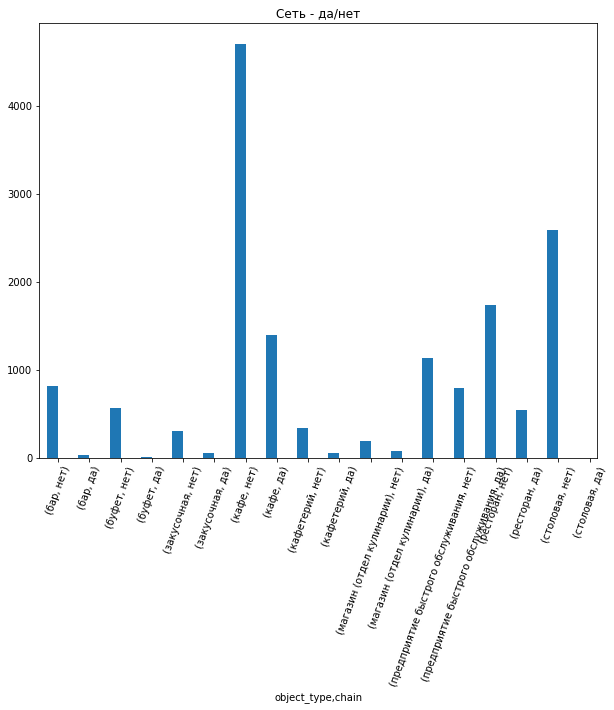

In [14]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
# ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.


width = 0.35

df.groupby(by='object_type')['chain'].value_counts().plot(kind='bar', ax=ax, width=width, position=1, figsize=(10, 8))
# df.groupby(by='Суд')['Рассмотрено'].mean().plot(kind='bar', color='darkgray', ax=ax, width=width, position=0)
# legend = ['Поступило дел', 'Рассмотрено дел']
# plt.legend(legend)
plt.title('Сеть - да/нет')
plt.xticks(rotation=70)


plt.show()

In [15]:
object_type = df[df['chain'] == 'да']['object_type']
fig = go.Figure(data=[go.Pie(labels=object_type)])
fig.update_layout(title_text="Формат сетевых заведений")
fig.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Обрати внимание, что некоторые графики у нас повторяются.
    
Это говорит о том, что мы можем создать функцию для постоянного их построения. И с помощью этого повысить оптимизацию своего кода и презентабельность проекта в целом.
    
То есть мы можем создать "обёртки" с методами, и в функцию будем подавать нужные перменные: 
    
- датасет
- подписи графика и осей
- и прочие любые настройки
    
</div>

Чаще всего сетевыми являются кафе, предприятия быстрого обслуживания и рестораны.

<a id="4"></a>
### 4. Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

Попробуем увидеть что-то на диаграмме рассеяния.

In [16]:
fig = px.scatter(df, x = 'number', color = 'chain',
                 title = 'Сетевые/несетевые заведения и кол-во мест в них')
fig.show()

Сделать однозначные выводы по этому графику сложно. Обратимся к гистограмме.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Классная картина 😊
    
</div>

In [17]:
fig = px.histogram(df[df['chain']== 'да'], x="number", title='Распределение мест в сетевых заведениях')
fig.update_layout(xaxis_title="Количество мест", yaxis_title="Количество заведений")
fig.show()

Для сетевых заведений заведений характерно много заведений с небольшим количеством посадочных мест.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Интересный и классный график.
    
В том числе можно было использовать стандартный  `boxplot`
    
</div>

<a id="5"></a>
### 5. Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

In [17]:
# fig = px.histogram(df[df['object_type']== 'кафе'], x="number", , title='Распределение мест в сетевых заведениях')
# fig.show()

In [18]:
# print('Среднее количество мест в кафе:', df[df['object_type']== 'кафе']['number'].mean())

In [18]:
df1 = df.pivot_table(['number'], ['object_type'],aggfunc='mean').sort_values(by='number', ascending=False)
df1

,number
object_type,
столовая,130.246618
ресторан,96.834136
буфет,51.129915
бар,43.494159
кафе,39.716019
предприятие быстрого обслуживания,20.552262
кафетерий,9.123116
закусочная,7.608333
магазин (отдел кулинарии),5.589744


In [19]:
df1.reset_index(level=0, inplace=True)
df1

,object_type,number
0,столовая,130.246618
1,ресторан,96.834136
2,буфет,51.129915
3,бар,43.494159
4,кафе,39.716019
5,предприятие быстрого обслуживания,20.552262
6,кафетерий,9.123116
7,закусочная,7.608333
8,магазин (отдел кулинарии),5.589744


In [20]:
fig = go.Figure(data=[go.Pie(labels=df1['object_type'], values=df1['number'])])
fig.update_layout(title_text="Соотношение посадочных мест")
fig.show()

Больше всего посадочных мест, по нашим данным, предоставляют столовые (32%), рестораны (24%) и буфеты (13%).

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Думаю мы и так знали, что столовая будет на первом месте по кол-ву посадочных мест, но самое главное – что мы подтвердили это с помощью данных, используя так называемый `data driven` подход 😊
    
Что может быть лучше? 😊
    
</div>

<a id="6"></a>
### 6. Выделите в отдельный столбец информацию об улице из столбца address

In [22]:
df.tail(5)

,id,object_name,chain,object_type,address,number
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36
15365,222535,Шоколадница,да,кафе,"город Москва, Ходынский бульвар, дом 4",10


In [23]:
df2 = df['address'].str.split(', ', expand=True)
df2 = df2[1]

In [24]:
df2

0         улица Егора Абакумова
1              улица Талалихина
2          Абельмановская улица
3            Абрамцевская улица
4            Абрамцевская улица
                  ...          
15361    3-й Крутицкий переулок
15362        улица Земляной Вал
15363        улица Земляной Вал
15364      поселение Московский
15365         Ходынский бульвар
Name: 1, Length: 15366, dtype: object

In [25]:
df = df.join(df2)

In [26]:
df.head(2)

,id,object_name,chain,object_type,address,number,1
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина


<a id="7"></a>
### 7. Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 7 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
1              15366 non-null object
dtypes: int64(2), object(5)
memory usage: 840.5+ KB


In [28]:
df.columns = ['id','object_name','chain','object_type','address','number','street']

In [29]:
df['street'].value_counts().sort_values(ascending=False).to_frame()

,street
город Зеленоград,232
проспект Мира,204
Профсоюзная улица,182
Ленинградский проспект,171
Пресненская набережная,167
...,...
Малый Полуярославский переулок,1
Тарханская улица,1
3-й Стрелецкий проезд,1
дом 90,1


Как мы видим, на первом месте оказалась не улица, а название города внутри Москвы. Попробуем исправить это.

In [30]:
# df.groupby('street')['object_name'].count().sort_values(ascending=False).to_frame()

По-разному выделим столбец с улицей для районов внутри МКАДа и за ним.

In [31]:
outmkad_data = df[df['address'].str.contains('город Зеленоград|поселение Сосенское|поселение Московский|город Троицк|город Московский|город Щербинка')]
msk_data = df[~df['address'].str.contains('город Зеленоград|поселение Сосенское|поселение Московский|город Троицк|город Московский|город Щербинка')]

msk_data['street'] = msk_data['address'].str.split(', ', expand=True)[1]
outmkad_data['street'] = outmkad_data['address'].str.split(', ', expand=True)[2]

new_data = pd.concat([msk_data, outmkad_data])

In [32]:
new_data

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15245,205607,KFC,да,предприятие быстрого обслуживания,"город Москва, поселение Московский, Киевское ш...",30,Киевское шоссе
15256,211215,Милти,да,предприятие быстрого обслуживания,"город Москва, город Щербинка, Железнодорожная ...",0,Железнодорожная улица
15327,210815,Милти,да,предприятие быстрого обслуживания,"город Москва, город Московский, улица Хабарова...",0,улица Хабарова
15342,210776,Мята Lounge,да,ресторан,"город Москва, город Московский, улица Хабарова...",50,улица Хабарова


In [33]:
top = new_data.groupby('street')['object_name'].count().sort_values(ascending=False).to_frame().head(10)

In [34]:
top

,object_name
street,
проспект Мира,204
Профсоюзная улица,182
Ленинградский проспект,171
Пресненская набережная,167
Варшавское шоссе,163
Ленинский проспект,147
проспект Вернадского,132
Кутузовский проспект,114
Каширское шоссе,112


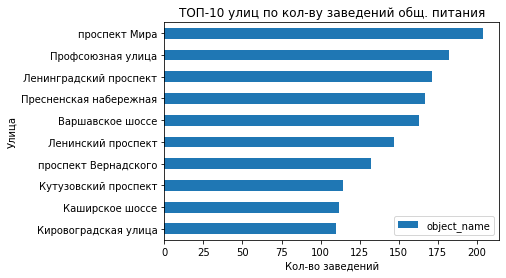

In [35]:
ax = top.sort_values(by='object_name').plot(title='ТОП-10 улиц по кол-ву заведений общ. питания', kind='barh')
ax.set_xlabel("Кол-во заведений")
ax.set_ylabel("Улица")
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>
    
Вопрос со "звездочкой" 😊:

Как ты считаешь это тот самый топ который нам нужен ? 
    
То есть возможно это улицы такие большие и поэтому в них большое количестов объектов питания ? 
    
</div>

In [36]:
top.index

Index(['проспект Мира', 'Профсоюзная улица', 'Ленинградский проспект',
       'Пресненская набережная', 'Варшавское шоссе', 'Ленинский проспект',
       'проспект Вернадского', 'Кутузовский проспект', 'Каширское шоссе',
       'Кировоградская улица'],
      dtype='object', name='street')

Из внешнего источника возьмём базу данных с названиями улиц, чтобы соотнести наши заведения с районами Москвы.

In [37]:
df3 = pd.read_csv('https://www.dropbox.com/s/rmraw6o3vtiwdd3/mosgaz-streets.csv?dl=1')
df3

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Здорово, что разобрались как подключать сторонний источник 😊👏👏
    
</div>

In [38]:
df3[df3.streetname.duplicated()]['streetname'].nunique()

549

549 улиц повторяются и относятся больше, чем к одному району. Это исказит результаты исследования. Тем не менее удалим дубликаты.

In [39]:
df3 = df3.drop_duplicates('streetname')

In [40]:
df3[df3.streetname.duplicated()]['streetname'].nunique()

0

In [41]:
df4 = pd.DataFrame(data = df3, columns = ['streetname', 'area', 'okrug'])

df4.columns = ['street', 'district', 'okrug']
df4

,street,district,okrug
0,Выставочный переулок,Пресненский район,ЦАО
1,улица Гашека,Пресненский район,ЦАО
2,Большая Никитская улица,Пресненский район,ЦАО
3,Глубокий переулок,Пресненский район,ЦАО
4,Большой Гнездниковский переулок,Пресненский район,ЦАО
...,...,...,...
4391,улица Брянский Пост,Пресненский район,ЦАО
4393,Вознесенский проезд,Пресненский район,ЦАО
4394,Волков переулок,Пресненский район,ЦАО
4396,Кудринская площадь,Пресненский район,ЦАО


In [42]:
new_data = new_data.merge(df4, on='street')

In [43]:
new_data.head()

,id,object_name,chain,object_type,address,number,street,district,okrug
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,Ярославский Район,СВАО
1,193477,Grill-House,нет,закусочная,"город Москва, улица Егора Абакумова, дом 14А",0,улица Егора Абакумова,Ярославский Район,СВАО
2,196756,Пекарня,нет,кафетерий,"город Москва, улица Егора Абакумова, дом 14А",12,улица Егора Абакумова,Ярославский Район,СВАО
3,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,Таганский район,ЦАО
4,83942,Кафе Даиси,нет,кафе,"город Москва, улица Талалихина, дом 31А/2",78,улица Талалихина,Таганский район,ЦАО


In [44]:
top = new_data.groupby(['street', 'district'])['object_name'].count().sort_values(ascending=False).to_frame().head(10)
top

,,object_name
street,district,
проспект Мира,Алексеевский район,204
Профсоюзная улица,Академический район,182
Ленинградский проспект,Район Аэропорт,171
Пресненская набережная,Пресненский район,167
Варшавское шоссе,Район Чертаново Центральное,163
Ленинский проспект,Район Проспект Вернадского,147
проспект Вернадского,Район Проспект Вернадского,132
Кутузовский проспект,Район Дорогомилово,114
Каширское шоссе,Район Москворечье-Сабурово,112


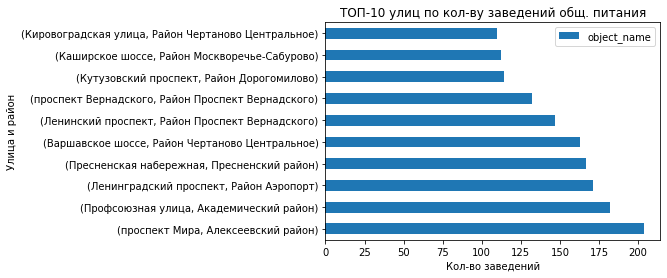

In [45]:
ax = top.plot(title='ТОП-10 улиц по кол-ву заведений общ. питания', kind='barh')
ax.set_xlabel("Кол-во заведений")
ax.set_ylabel("Улица и район")
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Хорошим тоном считается показывать значения на графиках. 
    
Кстати это можно сделать с помощью:
    
- в бибилотеке `plotly` с помощью атрибута `text`, например в методе `px.bar`
- в библиотеке `matplotlib` <a href="https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples">первый пример</a>, <a href="https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html">второй пример</a> для группированных графиков
    
</div>

<a id="8"></a>
### 8. Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [46]:
new_data.head(2)

,id,object_name,chain,object_type,address,number,street,district,okrug
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,Ярославский Район,СВАО
1,193477,Grill-House,нет,закусочная,"город Москва, улица Егора Абакумова, дом 14А",0,улица Егора Абакумова,Ярославский Район,СВАО


In [47]:
df5 = new_data.pivot_table('object_name',['street', 'district'],aggfunc='count')[new_data.pivot_table('object_name',['street', 'district'],aggfunc='count').object_name==1]
df5.head(10)

,,object_name
street,district,
1-й Балтийский переулок,Район Аэропорт,1
1-й Басманный переулок,Басманный район,1
1-й Ботанический проезд,Район Свиблово,1
1-й Вешняковский проезд,Рязанский район,1
1-й Голутвинский переулок,Район Якиманка,1
1-й Зачатьевский переулок,Район Хамовники,1
1-й Кирпичный переулок,Район Соколиная Гора,1
1-й Кожевнический переулок,Даниловский район,1
1-й Кожуховский проезд,Даниловский район,1


In [48]:
df5.reset_index()

,street,district,object_name
0,1-й Балтийский переулок,Район Аэропорт,1
1,1-й Басманный переулок,Басманный район,1
2,1-й Ботанический проезд,Район Свиблово,1
3,1-й Вешняковский проезд,Рязанский район,1
4,1-й Голутвинский переулок,Район Якиманка,1
...,...,...,...
515,улица Шеногина,Район Хорошево-Мневники,1
516,улица Шумилова,Район Кузьминки,1
517,улица Шумкина,Район Сокольники,1
518,улица Щорса,Район Солнцево,1


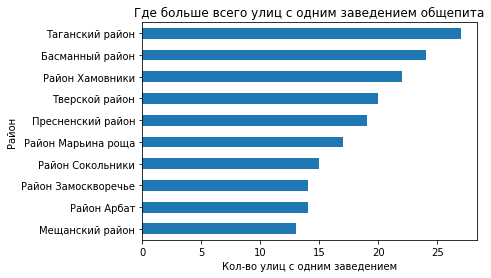

In [49]:
ax = df5.groupby('district')['object_name'].count().sort_values().tail(10).plot(title='Где больше всего улиц с одним заведением общепита', kind='barh')
ax.set_xlabel("Кол-во улиц с одним заведением")
ax.set_ylabel("Район")
plt.show()

In [50]:
print('Количество улиц с одним объектом общепита:', len(new_data.pivot_table('object_name',['street', 'district'],aggfunc='count')[new_data.pivot_table('object_name',['street', 'district'],aggfunc='count').object_name==1]))

Количество улиц с одним объектом общепита: 520


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Теперь мы знаем в каких районах меньше всего заведений общепита.
    
</div>

Больше всего улиц с одним объектом общепита, исходя из имеющихся данных, находятся в Таганском, Басманном районах и в Хамовниках.

<a id="9"></a>
### 9. Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

Выберем 10 улиц, где расположено больше всего заведений.

In [51]:
top = new_data.groupby(['street'])['object_name'].count().sort_values(ascending=False).to_frame().head(10).index
top

Index(['проспект Мира', 'Профсоюзная улица', 'Ленинградский проспект',
       'Пресненская набережная', 'Варшавское шоссе', 'Ленинский проспект',
       'проспект Вернадского', 'Кутузовский проспект', 'Каширское шоссе',
       'Кировоградская улица'],
      dtype='object', name='street')

In [52]:
new_data.head(1)

,id,object_name,chain,object_type,address,number,street,district,okrug
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,Ярославский Район,СВАО


Выберем из основного датасета улицы, которые входят в топ-10, и посмотрим на распределение.

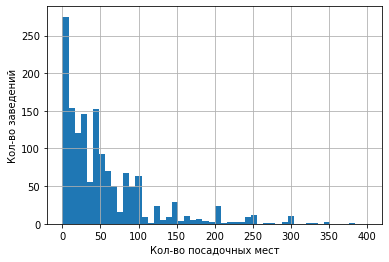

In [53]:
ax = new_data[new_data['street'].isin(top)]['number'].hist(bins = 50, range = (0, 400))
ax.set_xlabel("Кол-во посадочных мест")
ax.set_ylabel("Кол-во заведений")
plt.show()

In [54]:
new_data[new_data['street'].isin(top)]['number'].describe()

count    1502.000000
mean       57.994674
std        90.006381
min         0.000000
25%        12.000000
50%        40.000000
75%        75.000000
max      1700.000000
Name: number, dtype: float64

Для улиц, где расположено больше всего заведений, характерно небольшое количество посадочных мест: 57 в среднем и 40 - медианное значение.

<a id="10"></a>
### 10. Выводы и рекомендации

1. Большинство заведений в Москве - кафе (40%). За ними идут столовые (17%), ресторан (15%), предприятия быстрого обслуживания (13%). Эти данные могут говорить и о том, какие заведения пользуются бОльшим спросом у москвичей. Поэтому, возможно, решение открыть именно кафе было правильным.

2. Подавляющее большинство заведений - несетевые (81%). Вероятно, и нам стоит начать с одного кафе.

3. Наиболее часто сетевыми являются кафе, предприятия быстрого обслуживания и рестораны.

4. Для сетевых объектов общепита заведений характерно много заведений с небольшим количеством посадочных мест.

5. Больше всего посадочных мест, по нашим данным, предлагают столовые (32%), рестораны (24%) и буфеты (13%).

6. Проспект Мира, Профсоюзная улица и Ленинградский проспект лидируют по количеству расположенных там заведений. Возможно, и нам стоит разсместить свое кафе там.

7. В Таганском, Басманном и Тверском районах больше всего улиц только с одним заведением общепита. Стоит осторожно выбирать место для нашего кафе в этих районах.

8. Для улиц, где расположено больше всего заведений, характерно небольшое количество посадочных мест: 57 в среднем и 40 - медианное значение.

Ссылка на презентацию: https://disk.yandex.ru/i/b2CIc96DjfvLUQ

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

В целом работа очень хорошая. Использовано достаточно большое количество информации, которое складывается в одну общую картинку.
    
На самом деле, там где мы используем повторяющиеся действия по построениям графиков, то есть однотипные графики, рекомендую создавать функции, чтобы не писать один и тот же код несколько раз. Тем самым сможем автоматизировать и оптимизировать свой проект.
    
---
    
    
Презентация сделана хорошо, особенно порадовало:
    
- её структурность
- начилие целей 
- наличие summary в самом начале презентации, все любят видеть результат сразу 😊
- выводы для всех графиков
- последовательность
    
Как её можно было бы ещё улучшить:
    
- пронумеровать слайды
- сделать оглавление
    
В остальном всё чудно😊
    
Поздравляю с успешным завершением проекта 😊👍
    
И желаю успехов в новых работах 😊

</div>